<a href="https://colab.research.google.com/github/IEXE-Tec/aprendizaje-maquina-2/blob/master/01_seleccion_de_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Graphics
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


# Seleccion Univariada

Para esta seccion utilizaremos el set de datos de penguinos, y trataremos de predecir el Sexo del Pinguino utilizando las demas varaibles -> Y='sex'

Carguemos el set de datos de pinguinos.

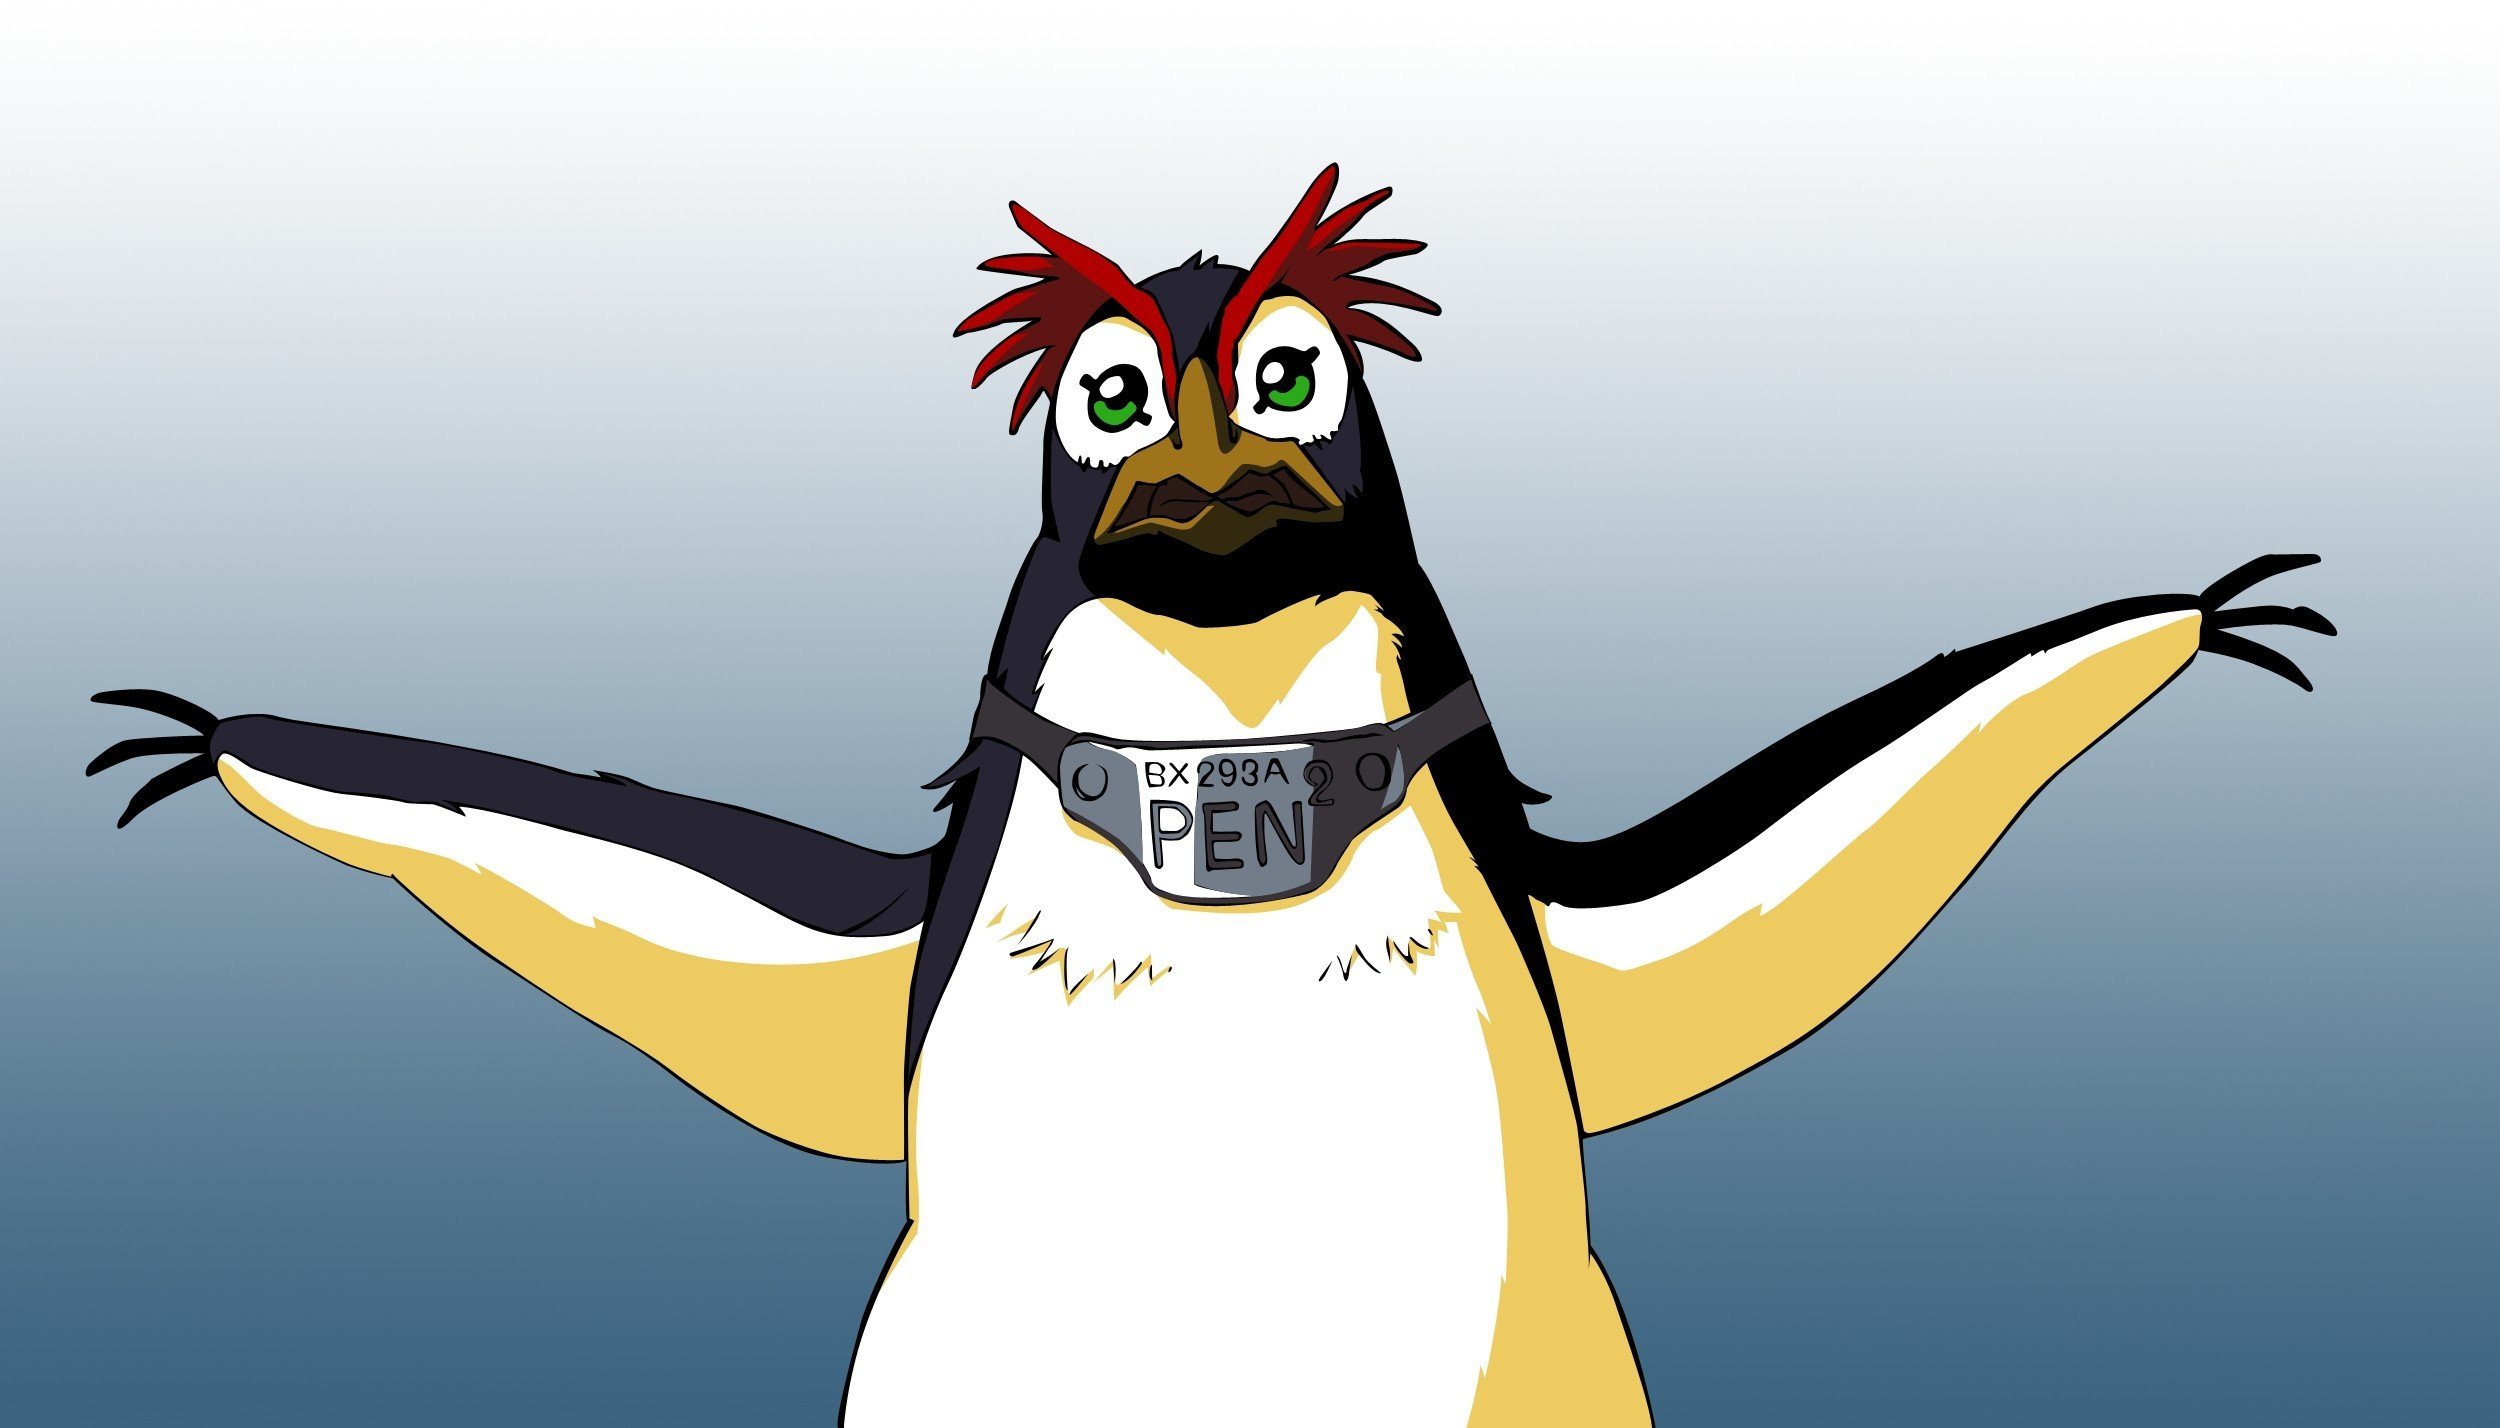

In [ ]:
# Load the penguin Dataset
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Eliminemos los missing y nan.
Cambiemos la varaible objetivo a 0 y 1 (Encoding)

In [ ]:
# Lets get rid of the nan
penguins.dropna(inplace=True)
# Encode the sex
penguins.replace({'Male':0, 'Female':1}, inplace=True)

Utilicemos el metodo de Pandas get_dummies. (https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

Recuerda utilizar el argumento drop_first=True, de lo contrario se creara una columna para cada valor de la variable lo cual causara problemas de colinealidad.

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0


In [ ]:
# Encode Species & island
pen = pd.get_dummies(penguins, columns=['species', 'island'], 
                          drop_first=True)
pen.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex', 'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen'],
      dtype='object')

## Analicemos la Varianza

In [ ]:
pen.std()/pen.mean()

bill_length_mm       0.124308
bill_depth_mm        0.114725
flipper_length_mm    0.069742
body_mass_g          0.191396
sex                  1.010568
species_Chinstrap    1.977068
species_Gentoo       1.343032
island_Dream         1.308610
island_Torgersen     2.470513
dtype: float64

## Analicemos sus correlaciones

In [ ]:
pen.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex', 'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen'],
      dtype='object')

In [ ]:
pen[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


Analicemos la matriz de correlaciones con un Heatmap

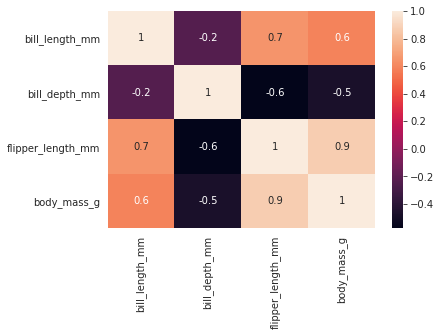

In [ ]:

sns.heatmap(pen[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
                 'body_mass_g']].corr(), annot = True, fmt='.1g')

## Chi-square

In [ ]:
# Importemos chi2 de sklearn
from sklearn.feature_selection import chi2

In [ ]:
catv = [c for c in pen.columns if ('island' in c)|('species' in c)]
X = pen[catv]
y = pen['sex']

chi_sq, p_val = chi2(X,y)
chi_values = pd.DataFrame.from_dict({'variable':X.columns,
                        'chi_sq':chi_sq, 'p_value':p_val})
chi_values.sort_values(ascending=True, by='p_value').round(3)


,variable,chi_sq,p_value
3,island_Torgersen,0.043,0.836
1,species_Gentoo,0.031,0.860
0,species_Chinstrap,0.006,0.941
2,island_Dream,0.000,0.992


In [ ]:
catv = [c for c in penguins.columns if ('island' in c)|('species' in c)]
X = penguins[catv]
y = penguins['sex']
# Encode categorical columns to numbers
X.replace({'Torgersen':0, 'Biscoe':1, 'Dream':2}, inplace=True)
X.replace({'Adelie':0, 'Chinstrap':1, 'Gentoo':2}, inplace=True)
# Independence Test
chi_sq, p_val = chi2(X,y)
chi_values = pd.DataFrame.from_dict({'variable':X.columns,
                        'chi_sq':chi_sq, 'p_value':p_val})
chi_values.sort_values(ascending=True, by='p_value').round(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,variable,chi_sq,p_value
0,species,0.034,0.853
1,island,0.004,0.948


# Predicciones

In [ ]:
cat_variables =  ['species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen']


In [ ]:
# Preprocess data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocess_split(X, y,test_size=0.2,random_state=5874,
                        scale_x=True,
                        cat_variables=[], 
                        scale_y=False):

  # Split data
  x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size, 
                                                    random_state=random_state)
  # Scale X
  if scale_x:
    # Find numerical column index
    num_i = [X.columns.get_loc(c) for c in X.columns if c not in cat_variables]
    cat_i = [X.columns.get_loc(c) for c in X.columns if c in cat_variables]
    # Scale Numerical Variables
    x_train_ = x_train.iloc[:, num_i]
    x_test_ = x_test.iloc[:, num_i]
    scaler = StandardScaler().fit(x_train_)
    x_train_ = scaler.transform(x_train_)
    x_test_ = scaler.transform(x_test_)
    # Create new dataframe
    x_train = np.concatenate([x_train_, x_train.iloc[:,cat_i]], axis=1)
    x_test = np.concatenate([x_test_, x_test.iloc[:,cat_i]],axis=1)

  # Scale Y
  if scale_y:
    scaler = StandardScaler().fit(y_train)
    y_train = scaler.transform(y_train)
    y_test = scaler.transform(y_test)

  return x_train, x_test, y_train, y_test



In [ ]:
# Funcion de regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def log_regression(x_train, x_test, y_train, y_test):
  
  #print(x_train.columns)
  # Train Logistic Model
  model = LogisticRegression()
  model.fit(x_train, y_train)

  #Test the model
  predictions = model.predict(x_test)

  #Check precision, recall, f1-score
  #print( '\n', classification_report(y_test, predictions) )
  print( 'Accuracy: ', accuracy_score(y_test, predictions))
  #print('\n Coefficients: \n', model.coef_)
  print('----------------------------------------------------------------')



In [ ]:
# Create data set
X = pen.loc[:, pen.columns!='sex']
y = pen['sex']

x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    random_state=5874,
                                                  cat_variables =cat_variables, 
                                                    test_size=0.2)
print('X columns: \n',X.columns)
log_regression(x_train, x_test, y_train, y_test)

X columns: 
 Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_Chinstrap', 'species_Gentoo', 'island_Dream',
       'island_Torgersen'],
      dtype='object')
Accuracy:  0.9253731343283582
----------------------------------------------------------------


## Realicemos una seleccion *univariada*

### Correlacion: Variables explicativas

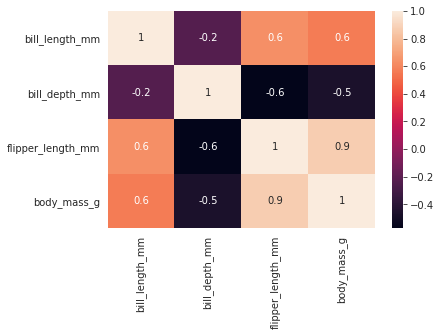

In [ ]:
X = pen.loc[:, pen.columns!='sex']
y = pen['sex']


x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    random_state=5874,
                                                  cat_variables =cat_variables, 
                                                    test_size=0.2)

sns.heatmap( pd.DataFrame(x_train, columns=X.columns)[['bill_length_mm', 
          'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr() , 
          annot = True, fmt='.1g')

Las variables explicativas de largo de aleta y peso estan muy relacionadas. No estaria mal quitar alguna de ellas.

### Chi-square: Variables categoricas y objetivo

In [ ]:
X = pen.loc[:, pen.columns!='sex']
y = pen['sex']

x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    random_state=5874,
                                                  cat_variables =cat_variables, 
                                                    test_size=0.2)
chi_sq, p_val = chi2(pd.DataFrame(x_train, columns=X.columns)[cat_variables],
                     y_train)
chi_values = pd.DataFrame.from_dict({'variable':cat_variables ,
                         'chi_sq':chi_sq, 'p_value':p_val})
chi_values.sort_values(ascending=True, by='p_value').round(3)

,variable,chi_sq,p_value
0,species_Chinstrap,0.491,0.484
3,island_Torgersen,0.121,0.728
2,island_Dream,0.045,0.832
1,species_Gentoo,0.017,0.898


In [ ]:
sub_set = [c for c in X.columns if ('island' not in c)]
sub_set = [c for c in sub_set if ('species' not in c)]

X = pen[sub_set]
y = pen['sex']

x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    test_size=0.2, 
                                                    random_state=5874)
print(X.columns)
log_regression(x_train, x_test, y_train, y_test)

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')
Accuracy:  0.9253731343283582
----------------------------------------------------------------


### Nuevo modelo

In [ ]:
sub_set = [c for c in X.columns if ('island' not in c)]
sub_set = [c for c in sub_set if ('species' not in c)]

X = pen[sub_set]
X = X.drop('flipper_length_mm', axis=1)
y = pen['sex']

x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    test_size=0.2, 
                                                    random_state=5874)
print(X.columns)
log_regression(x_train, x_test, y_train, y_test)

Index(['bill_length_mm', 'bill_depth_mm', 'body_mass_g'], dtype='object')
Accuracy:  0.9253731343283582
----------------------------------------------------------------


### Correlacion Biserial Puntual

In [ ]:
from scipy.stats import pointbiserialr

for c in ['bill_length_mm', 'bill_depth_mm', 
          'flipper_length_mm', 'body_mass_g']:
  pbc = pointbiserialr(pen[c], pen['sex'])
  print(c, ',sex')
  print('Correlation: ', pbc[0])
  print('P-value: ', pbc[1])
  print()

bill_length_mm ,sex
Correlation:  -0.3440777822374857
P-value:  1.0942555387200282e-10

bill_depth_mm ,sex
Correlation:  -0.37267328821677687
P-value:  2.0664103457552388e-12

flipper_length_mm ,sex
Correlation:  -0.2551688758106062
P-value:  2.391097092554368e-06

body_mass_g ,sex
Correlation:  -0.42498699090399544
P-value:  4.897246751596525e-16



# Tarea y Feature Importance

Utilizaremos un Clasificador Random Forest para evaluar nuestros datos de pinguinos.

Si tienes dudas sobre la funcion te recomendamos revisar la documentacion:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier

# define dataset
X = pen.loc[:, pen.columns!='sex']
y = pen['sex']
x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    random_state=5874,
                                                    cat_variables =cat_variables, 
                                                    test_size=0.2)
# define the model
model = RandomForestClassifier(random_state=13)
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
pd.DataFrame.from_dict({'variable':X.columns,'importance':importance})

,variable,importance
0,bill_length_mm,0.206755
1,bill_depth_mm,0.295730
2,flipper_length_mm,0.120571
3,body_mass_g,0.305485
4,species_Chinstrap,0.018858
5,species_Gentoo,0.034700
6,island_Dream,0.010054
7,island_Torgersen,0.007847


## Preguntas de Tarea
1. Como cambia el Feature Importance si utilizamos el modelo sin variables categoricas? 
2. Como cambia el Feature Importance si ademas de quitar las variables categoricas, tambien removemos 'flipper_length_mm'?


1. Como cambia el Feature Importance si utilizamos el modelo sin variables categoricas? 

In [ ]:
# Utiliza estas funciones, con las semillas indicadas para responder las
# preguntas anteriores

# TODO Define X & Y

# No Modificar: Split
x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    random_state=5874,
                                                    cat_variables =cat_variables, 
                                                    test_size=0.2)
# No Modificar: Define Model
model = RandomForestClassifier(random_state=13)

#TODO Entrenar modelo

#TODO calcular feature importance

2. Como cambia el Feature Importance si ademas de quitar las variables categoricas, tambien removemos 'flipper_length_mm'?

In [ ]:
# Utiliza estas funciones, con las semillas indicadas para responder las
# preguntas anteriores

# TODO Define X & Y

# No Modificar: Split
x_train, x_test, y_train, y_test = preprocess_split(X, y, scale_x=True, 
                                                    random_state=5874,
                                                    cat_variables =cat_variables, 
                                                    test_size=0.2)
# No Modificar: Define Model
model = RandomForestClassifier(random_state=13)

#TODO Entrenar modelo

#TODO calcular feature importance